# Demo and test environments

In [1]:
%reload_ext autoreload
%autoreload 2
import gym
import matplotlib.pyplot as plt
from ezai.env import env_info
import numpy as np
import copy
import yaml

In [2]:
from IPython.display import display,Javascript
import ipywidgets
env_map={'ride-v0':'0.4.4',
         'arora-v0':'2.10.17',
         'arora-v0 simpro':'2.10.17_simpro'}
env_id_list=list(env_map.keys())
selected_id = 2
env_dd = ipywidgets.Dropdown(
       options=env_id_list,
       value=env_id_list[selected_id],
       description='Environment:')
ver = ipywidgets.Text(
       value=env_map[env_id_list[selected_id]],
       description='Version:', )
def nxtHandler(b):
    display(Javascript('Jupyter.notebook.select_next().get_selected_cell()'))
    #get_ipython().set_next_input(replace=False)
    
nxt = ipywidgets.Button(description='Next Cell')
nxt.on_click(nxtHandler)

def update_ver(*args):
    ver.value = env_map.get(env_dd.value)
    
env_dd.observe(update_ver, 'value')
box = ipywidgets.HBox([env_dd,ver,nxt])
display(box)

In [4]:
env_id = env_dd.value

if "ride-v0" in env_id:
#from navsim_envs import ride as navenv
    from navsim_envs.ride import default_env_config
    from navsim_envs.ride import RideUnityEnv as UnityEnv
    from navsim_envs.ride import RideGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/RIDE_{ver.value}/RIDE"
elif "arora-v0" in env_id:
    env_id = "arora-v0"
    from navsim_envs.arora import default_env_config
    from navsim_envs.arora import AroraUnityEnv as UnityEnv
    from navsim_envs.arora import AroraGymEnv as GymEnv
    env_path = f"/data/work/unity-envs/ARORA_{ver.value}/ARORA"

from navsim_envs.util import Viz
print(env_id,':',env_path)

arora-v0 : /data/work/unity-envs/ARORA_2.10.17_simpro/ARORA


In [5]:
env_config = None
def config(conf={}):
    global env_config
    env_config = default_env_config.copy()
    env_config["env_path"]=env_path
    env_config["seed"]=123
    env_config["timeout"]=60
    env_config["obs_mode"]=1
    for key,val in conf.items():
        env_config[key]=val
config()
print(yaml.dump(env_config))

agent_car_physics: 0
area: 0
base_port: 5004
debug: false
env_gpu_id: 0
env_path: /data/work/unity-envs/ARORA_2.10.17_simpro/ARORA
episode_max_steps: 1000
goal: 0
goal_clearance: 2.5
goal_distance: 50
log_folder: ./env_log
obs_height: 64
obs_mode: 1
obs_width: 64
relative_steering: true
reward_collision_mul: 4
reward_for_goal: 50
reward_for_no_viable_path: -50
reward_spl_delta_mul: 1
reward_step_mul: 0.1
save_actions: true
save_vector_obs: true
save_visual_obs: true
seed: 123
segmentation_mode: 1
show_visual: false
start_from_episode: 1
task: 0
terrain: 0
timeout: 60
traffic_vehicles: 0
worker_id: 0



# The UnityEnv

In [ ]:
config()

In [ ]:
#env_config["env_path"]=None
uenv = UnityEnv(env_config)

In [ ]:
uenv.reset()
#uenv.reset() #added extra reset because of ride

In [ ]:
print(uenv.unity_max_x,uenv.unity_max_z)

In [ ]:
print(uenv.navmap_max_x,uenv.navmap_max_y)

In [ ]:
print(uenv.shortest_path)

In [ ]:
uenv.close()

# The GymEnv

In [8]:
# look at all observation modes
for i in UnityEnv.observation_modes:
    config({"obs_mode":i})
    env = gym.make(env_id, env_config=env_config) # ride.RideGymEnv(env_config)
    print('Observation Mode {}'.format(env_config["obs_mode"]))
    env_info(env)
    obs = env.reset()
    env.close()
    del env

E0525 15:22:36.673314537   22741 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


[INFO] Connected to Unity environment with package version 2.3.0-exp.2 and communication version 1.5.0
[INFO] Created UnityEnvironment from /mnt/disk1/work/unity-envs/ARORA_2.10.17_simpro/ARORA at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
Observation Mode 0
-----------
Env Info
-----------
arora-v0
Action Space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
Observation Space: Tuple(Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf], (16,), float32))
Reward Range: (-inf, inf)
Metadata: {'render.modes': ['vector', 'rgb_array', 'depth', 'segmentation']}
--------------------------------------


E0525 15:22:44.445763882   22741 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


[INFO] Connected to Unity environment with package version 2.3.0-exp.2 and communication version 1.5.0
[INFO] Created UnityEnvironment from /mnt/disk1/work/unity-envs/ARORA_2.10.17_simpro/ARORA at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
Observation Mode 1
-----------
Env Info
-----------
arora-v0
Action Space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
Observation Space: Tuple(Box([[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...


In [6]:
def plot_image_grid(images, ncols=None, cmap='gray',title=''):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    f.suptitle(title)
    axes = axes.flatten()[:len(imgs)]
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img, cmap=cmap)
            

E0525 15:16:10.980362489   22741 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


[INFO] Connected to Unity environment with package version 2.3.0-exp.2 and communication version 1.5.0
[INFO] Created UnityEnvironment from /mnt/disk1/work/unity-envs/ARORA_2.10.17_simpro/ARORA at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


/opt/mamba/envs/ezai/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


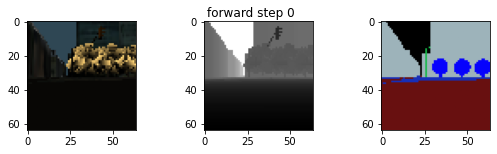

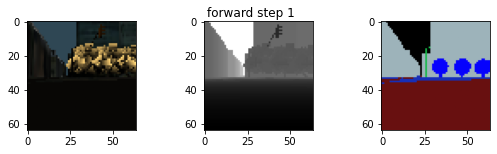

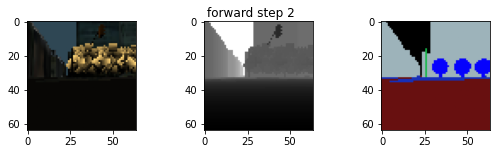

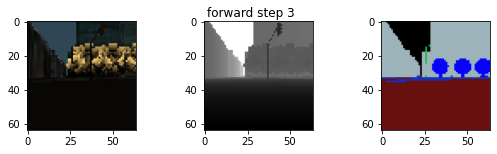

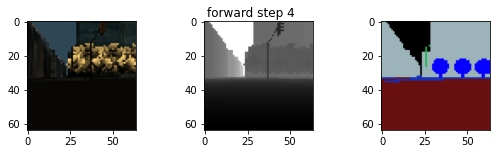

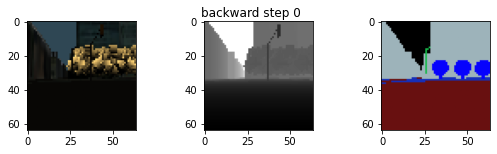

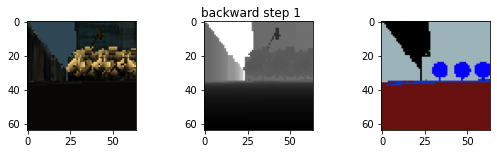

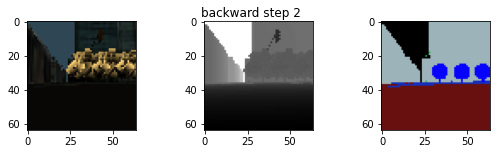

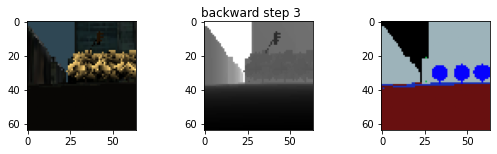

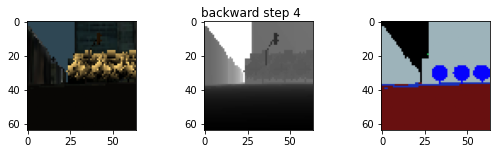

In [7]:
# test for 5 steps forward and 5 steps back 
config({"obs_mode":1,"env_gpu_id":0,"show_visual":True})

env = gym.make(env_id, env_config=env_config)
render_modes = env.metadata['render.modes'][1:]
steps = 5
obs = env.reset()
for direction in ['forward','backward']:
    for i in range(steps):
        obs = env.step(UnityEnv.actions[direction])
        plot_image_grid([env.render(mode=m) for m in render_modes],
                        ncols=len(render_modes),
                        title=f'{direction} step {i}')
        
env.close()
del env

# The mapping capabilities

In [9]:
config()

In [10]:
env = gym.make(env_id, env_config=env_config)

E0525 15:30:59.294533382   22741 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


[INFO] Connected to Unity environment with package version 2.3.0-exp.2 and communication version 1.5.0
[INFO] Created UnityEnvironment from /mnt/disk1/work/unity-envs/ARORA_2.10.17_simpro/ARORA at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


In [ ]:
navmap = env.get_navigable_map()

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(navmap,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
area = env.get_navigable_map_zoom_area(0,0,29,19)
print(area.shape)

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(area,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(navmap[0:20,0:30],origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
env.close()

In [ ]:
env_config["env_gpu_id"]=1
uenv = UnityEnv(env_config)
uenv.reset()
uenv.close()
!nvidia-smi
!ps -aux | grep crt

# Planner capabilities

# pending bugs

1. When you call ARORA shortest_path second time or more, the path is empty.
2. For RIDE, shortest path isnt even coming
3. 